# Assignment-3

## Import Libraries

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Embedding, LSTM, Conv1D, MaxPooling1D

Using TensorFlow backend.


## Read the Data from the text files

In [0]:
TRAIN_DATA_PATH = "train.txt"
TEST_DATA_PATH = "test.txt"


train_tweets = open(TRAIN_DATA_PATH, 'r').readlines()
test_tweets = open(TEST_DATA_PATH, 'r').readlines()

In [0]:
train_data = {}
for i in train_tweets:
    line = i[:-1].split("\t")
    if(len(line) > 1):
        if(line[0] == "meta"):
            current_tweet = line[1]
            train_data[current_tweet] = [[], line[2]]
        else:
            train_data[current_tweet][0].append((line[0], line[1]))
            
            
test_data = {}
for i in test_tweets:
    line = i[:-1].split("\t")
    if(len(line) > 1):
        if(line[0] == "meta"):
            current_tweet = line[1]
            test_data[current_tweet] = [[], line[2]]
        else:
            test_data[current_tweet][0].append((line[0], line[1]))

## Get the list of all words (Build the vocabulary)

In [0]:
words = []
for i in train_data.keys():
  for j in np.array(train_data[i][0])[:, 0]:
    if(j not in words):
      words.append(j)

for i in test_data.keys():
  for j in np.array(test_data[i][0])[:, 0]:
    if(j not in words):
      words.append(j)

In [6]:
print("Total number of unique words: ", len(words))

Total number of unique words:  66950


## Preprocess the Data

In [0]:
X = []
y = []
x_test = []
y_test = []
for i in train_data.keys():
    X.append(np.array(list(map(lambda x:words.index(x)+1, np.array(train_data[i][0])[:, 0]))))
    y.append([train_data[i][1]])

for i in test_data.keys():
    x_test.append(np.array(list(map(lambda x:words.index(x)+1, np.array(test_data[i][0])[:, 0]))))
    y_test.append([test_data[i][1]])

X = np.array(X)
y = np.array(y)
x_test = np.array(x_test)
y_test = np.array(y_test)

In [8]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')
y = enc.fit_transform(y).toarray()
y_test = enc.transform(y_test).toarray()
# from sklearn.model_selection import train_test_split
# x_train, x_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
x_train = X
y_train = y

x_train = sequence.pad_sequences(x_train, maxlen = 100)
x_test = sequence.pad_sequences(x_test, maxlen = 100)

print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

x_train shape: (15131, 100)
x_test shape: (1869, 100)


## Build the Model

In [0]:
batch_size = 30
epochs = 5

In [10]:
model = Sequential()

model.add(Embedding(20000, 128, input_length = 100))
model.add(Dropout(0.5))

model.add(Conv1D(filters = 64, kernel_size = 5, padding = 'valid', activation = 'relu', strides = 1))
model.add(MaxPooling1D(pool_size = 4))
model.add(Dropout(0.5))

model.add(Conv1D(filters = 64, kernel_size = 5, padding = 'valid', activation = 'relu', strides = 1))
model.add(MaxPooling1D(pool_size = 4))
model.add(Dropout(0.5))

model.add(LSTM(70, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(3))

model.add(Activation('sigmoid'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model.summary()





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.



Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 128)          2560000   
_________________________________________________________________
dropout_1 (Dropout)          (None, 100, 128)          0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 96, 64)            41024     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 24, 64)            0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 24, 64)            0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 20, 64)            20544    

Train...
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 15131 samples, validate on 1869 samples
Epoch 1/5





15131/15131 [==============================] - 13s 873us/step - loss: 0.9832 - acc: 0.4742 - val_loss: 0.9681 - val_acc: 0.5201
Epoch 2/5
15131/15131 [==============================] - 9s 583us/step - loss: 0.8148 - acc: 0.6271 - val_loss: 0.9683 - val_acc: 0.5597
Epoch 3/5
15131/15131 [==============================] - 9s 583us/step - loss: 0.7104 - acc: 0.6967 - val_loss: 0.9945 - val_acc: 0.5570
Epoch 4/5
15131/15131 [==============================] - 9s 585us/step - loss: 0.6294 - acc: 0.7430 - val_loss: 1.0452 - val_acc: 0.5511
Epoch 5/5
15131/15131 [==============================] - 9s 610us/step - loss: 0.5593 - acc: 0.7821 - val_loss: 1.1246 - val_acc: 0.5367
dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


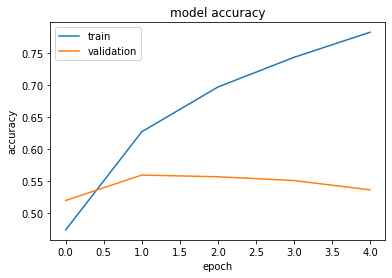

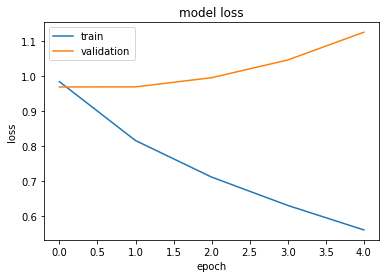

1869/1869 [==============================] - 0s 190us/step
Test score: 1.1245573720809545
Test accuracy: 0.5366506209151511


In [11]:
print('Train...')
history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=5,
          validation_data=(x_test, y_test))
print(history.history.keys())
#  "Accuracy"
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
score, acc = model.evaluate(x_test, y_test, batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

In [12]:
model2 = Sequential()
model2.add(Embedding(20000, 128, input_length = 100))
model2.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model2.add(Dense(64, activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(3, activation='sigmoid'))


model2.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model2.summary()

print('Train...')
model2.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=8,
          validation_data=(x_test, y_test))
score, acc = model.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 100, 128)          2560000   
_________________________________________________________________
lstm_2 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_4 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 195       
Total params: 2,700,035
Trainable params: 2,700,035
Non-trainable params: 0
_________________________________________________________________
Train...
Train on 15131 samples, validate on 1869 samples
Epoch 1/8
15131/15131 [=============================

In [13]:
model3 = Sequential()
model3.add(Embedding(20000, 128, input_length = 100))
model3.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model3.add(Dense(3, activation='sigmoid'))


model3.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model3.summary()

print('Train...')
model3.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=8,
          validation_data=(x_test, y_test))
score, acc = model.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 100, 128)          2560000   
_________________________________________________________________
lstm_3 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dense_4 (Dense)              (None, 3)                 387       
Total params: 2,691,971
Trainable params: 2,691,971
Non-trainable params: 0
_________________________________________________________________
Train...
Train on 15131 samples, validate on 1869 samples
Epoch 1/8
15131/15131 [==============================] - 94s 6ms/step - loss: 0.9354 - acc: 0.5273 - val_loss: 0.9908 - val_acc: 0.5179
Epoch 2/8
15131/15131 [==============================] - 92s 6ms/step - loss: 0.7476 - acc: 0.6686 - val_loss: 0.9785 - val_acc: 0.5500
Epoch 3/8
15131/15131 [=====================

In [0]:
y_pred = (model.predict(x_test) + model2.predict(x_test) + model3.predict(x_test))/3

In [15]:
y_pred

array([[0.00555012, 0.7136476 , 0.19501954],
       [0.01518719, 0.22893906, 0.7154278 ],
       [0.57976776, 0.4512259 , 0.01297277],
       ...,
       [0.44231915, 0.54875046, 0.07104179],
       [0.98172045, 0.01267728, 0.003672  ],
       [0.9811373 , 0.01804602, 0.00617455]], dtype=float32)

In [0]:
y_pred_ = [np.argmax(i) for i in y_pred]
y_test_ = [np.argmax(i) for i in y_test]

from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score
ac = accuracy_score(y_test_, y_pred_)
cm = confusion_matrix(y_test_, y_pred_)
# p = precision_score(y_test_, y_pred_)

In [18]:
ac

0.5248796147672552

In [19]:
cm

array([[312, 160,  61],
       [194, 349, 211],
       [ 76, 186, 320]])